# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

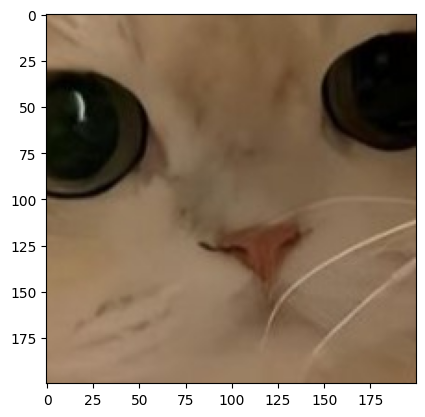

In [2]:
### START CODE HERE ###
image = 'assets/pic.jpg'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [7]:
### START CODE HERE ###
def plot_histogram(image):
    # Calculate histogram for each RGB channel
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    
    # Combine all histograms
    return hist_r, hist_g, hist_b
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

Text(0.5, 1.0, 'Original RGB Histogram')

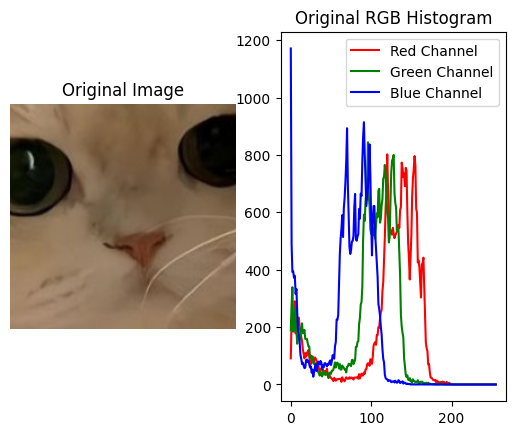

In [17]:
### START CODE HERE ###

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')

hist_r, hist_g, hist_b = plot_histogram(img)
ax[1].plot(hist_r, color='red', label='Red Channel')
ax[1].plot(hist_g, color='green', label='Green Channel')
ax[1].plot(hist_b, color='blue', label='Blue Channel')
ax[1].legend()
ax[1].set_title('Original RGB Histogram')










### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

Text(0.5, 1.0, 'Equalized RGB Histogram')

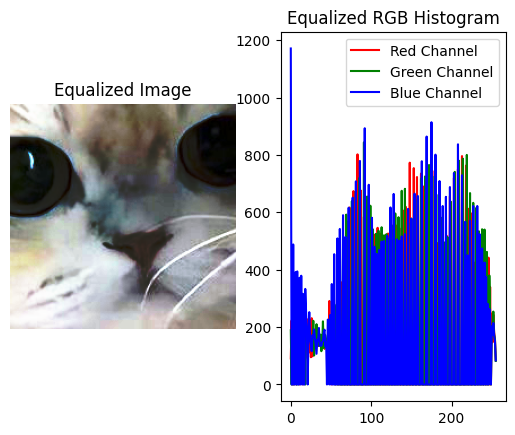

In [18]:
### START CODE HERE ###

# Apply histogram equalization to each channel separately
img_eq = np.zeros_like(img)
img_eq[:, :, 0] = cv2.equalizeHist(img[:, :, 0])  # Red channel
img_eq[:, :, 1] = cv2.equalizeHist(img[:, :, 1])  # Green channel
img_eq[:, :, 2] = cv2.equalizeHist(img[:, :, 2])  # Blue channel

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_eq)
ax[0].axis('off')
ax[0].set_title('Equalized Image')

hist_r, hist_g, hist_b = plot_histogram(img_eq)
ax[1].plot(hist_r, color='red', label='Red Channel')
ax[1].plot(hist_g, color='green', label='Green Channel')
ax[1].plot(hist_b, color='blue', label='Blue Channel')
ax[1].legend()
ax[1].set_title('Equalized RGB Histogram')







 
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [21]:
### START CODE HERE ###

img1 = cv2.imread('assets/pic.jpg')
img2 = cv2.imread('assets/pic2.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

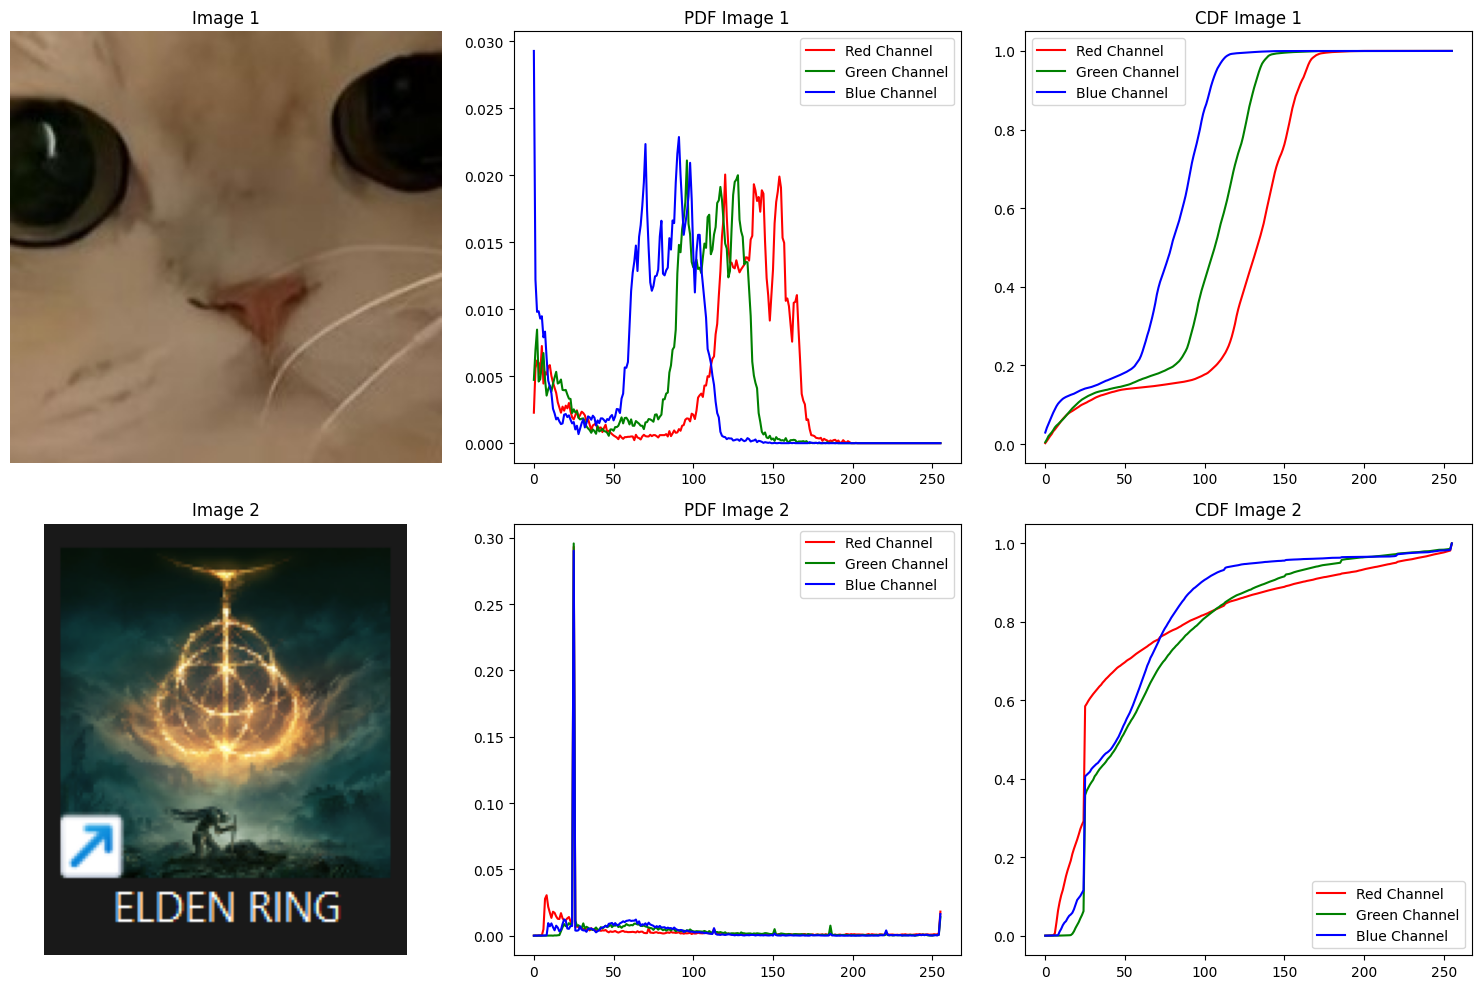

In [25]:
### START CODE HERE ###

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# First row - Image 1
ax[0, 0].imshow(img1)
ax[0, 0].axis('off')
ax[0, 0].set_title('Image 1')

# Calculate histograms for img1
hist1_r, hist1_g, hist1_b = plot_histogram(img1)

# PDF for Image 1
total_pixels1 = img1.shape[0] * img1.shape[1]
pdf1_r = hist1_r.flatten() / total_pixels1
pdf1_g = hist1_g.flatten() / total_pixels1
pdf1_b = hist1_b.flatten() / total_pixels1

ax[0, 1].plot(pdf1_r, color='red', label='Red Channel')
ax[0, 1].plot(pdf1_g, color='green', label='Green Channel')
ax[0, 1].plot(pdf1_b, color='blue', label='Blue Channel')
ax[0, 1].set_title('PDF Image 1')
ax[0, 1].legend()

# CDF for Image 1
cdf1_r = np.cumsum(pdf1_r)
cdf1_g = np.cumsum(pdf1_g)
cdf1_b = np.cumsum(pdf1_b)

ax[0, 2].plot(cdf1_r, color='red', label='Red Channel')
ax[0, 2].plot(cdf1_g, color='green', label='Green Channel')
ax[0, 2].plot(cdf1_b, color='blue', label='Blue Channel')
ax[0, 2].set_title('CDF Image 1')
ax[0, 2].legend()

# Second row - Image 2
ax[1, 0].imshow(img2)
ax[1, 0].axis('off')
ax[1, 0].set_title('Image 2')

# Calculate histograms for img2
hist2_r, hist2_g, hist2_b = plot_histogram(img2)

# PDF for Image 2
total_pixels2 = img2.shape[0] * img2.shape[1]
pdf2_r = hist2_r.flatten() / total_pixels2
pdf2_g = hist2_g.flatten() / total_pixels2
pdf2_b = hist2_b.flatten() / total_pixels2

ax[1, 1].plot(pdf2_r, color='red', label='Red Channel')
ax[1, 1].plot(pdf2_g, color='green', label='Green Channel')
ax[1, 1].plot(pdf2_b, color='blue', label='Blue Channel')
ax[1, 1].set_title('PDF Image 2')
ax[1, 1].legend()

# CDF for Image 2
cdf2_r = np.cumsum(pdf2_r)
cdf2_g = np.cumsum(pdf2_g)
cdf2_b = np.cumsum(pdf2_b)

ax[1, 2].plot(cdf2_r, color='red', label='Red Channel')
ax[1, 2].plot(cdf2_g, color='green', label='Green Channel')
ax[1, 2].plot(cdf2_b, color='blue', label='Blue Channel')
ax[1, 2].set_title('CDF Image 2')
ax[1, 2].legend()

plt.tight_layout()
plt.show()

### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

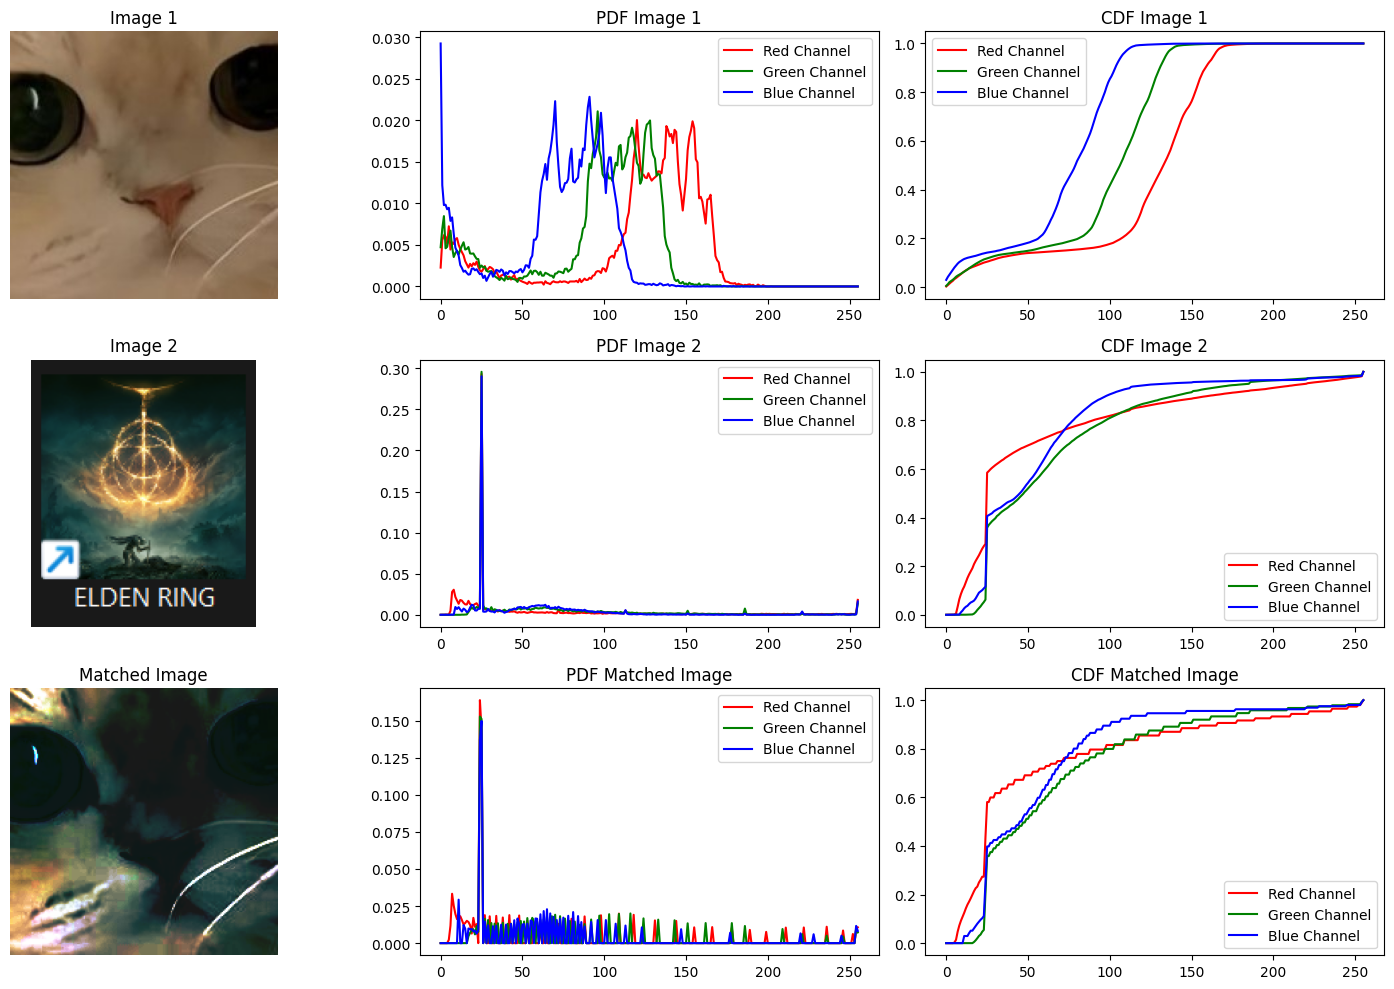

In [29]:
### START CODE HERE ###
### START CODE HERE ###

# Perform histogram matching first
def histogram_matching(source_img, reference_img):
	"""
	Perform histogram matching between source and reference images
	"""
	matched = np.zeros_like(source_img)
	
	for channel in range(3):  # For RGB channels
		# Get histograms
		source_hist, _ = np.histogram(source_img[:, :, channel].flatten(), 256, [0, 256])
		ref_hist, _ = np.histogram(reference_img[:, :, channel].flatten(), 256, [0, 256])
		
		# Calculate CDFs
		source_cdf = source_hist.cumsum()
		source_cdf = source_cdf / source_cdf[-1]
		
		ref_cdf = ref_hist.cumsum()
		ref_cdf = ref_cdf / ref_cdf[-1]
		
		# Create mapping
		mapping = np.zeros(256)
		for i in range(256):
			# Find closest CDF value in reference
			diff = np.abs(ref_cdf - source_cdf[i])
			mapping[i] = np.argmin(diff)
		
		# Apply mapping
		matched[:, :, channel] = mapping[source_img[:, :, channel]]
	
	return matched.astype(np.uint8)

# Create the matched image
img_matched = histogram_matching(img1, img2)

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

# First row - Image 1
ax[0, 0].imshow(img1)
ax[0, 0].axis('off')
ax[0, 0].set_title('Image 1')

# Calculate histograms for img1
hist1_r, hist1_g, hist1_b = plot_histogram(img1)

# PDF for Image 1
total_pixels1 = img1.shape[0] * img1.shape[1]
pdf1_r = hist1_r.flatten() / total_pixels1
pdf1_g = hist1_g.flatten() / total_pixels1
pdf1_b = hist1_b.flatten() / total_pixels1

ax[0, 1].plot(pdf1_r, color='red', label='Red Channel')
ax[0, 1].plot(pdf1_g, color='green', label='Green Channel')
ax[0, 1].plot(pdf1_b, color='blue', label='Blue Channel')
ax[0, 1].set_title('PDF Image 1')
ax[0, 1].legend()

# CDF for Image 1
cdf1_r = np.cumsum(pdf1_r)
cdf1_g = np.cumsum(pdf1_g)
cdf1_b = np.cumsum(pdf1_b)

ax[0, 2].plot(cdf1_r, color='red', label='Red Channel')
ax[0, 2].plot(cdf1_g, color='green', label='Green Channel')
ax[0, 2].plot(cdf1_b, color='blue', label='Blue Channel')
ax[0, 2].set_title('CDF Image 1')
ax[0, 2].legend()

# Second row - Image 2
ax[1, 0].imshow(img2)
ax[1, 0].axis('off')
ax[1, 0].set_title('Image 2')

# Calculate histograms for img2
hist2_r, hist2_g, hist2_b = plot_histogram(img2)

# PDF for Image 2
total_pixels2 = img2.shape[0] * img2.shape[1]
pdf2_r = hist2_r.flatten() / total_pixels2
pdf2_g = hist2_g.flatten() / total_pixels2
pdf2_b = hist2_b.flatten() / total_pixels2

ax[1, 1].plot(pdf2_r, color='red', label='Red Channel')
ax[1, 1].plot(pdf2_g, color='green', label='Green Channel')
ax[1, 1].plot(pdf2_b, color='blue', label='Blue Channel')
ax[1, 1].set_title('PDF Image 2')
ax[1, 1].legend()

# CDF for Image 2
cdf2_r = np.cumsum(pdf2_r)
cdf2_g = np.cumsum(pdf2_g)
cdf2_b = np.cumsum(pdf2_b)

ax[1, 2].plot(cdf2_r, color='red', label='Red Channel')
ax[1, 2].plot(cdf2_g, color='green', label='Green Channel')
ax[1, 2].plot(cdf2_b, color='blue', label='Blue Channel')
ax[1, 2].set_title('CDF Image 2')
ax[1, 2].legend()

# Third row - Matched Image
ax[2, 0].imshow(img_matched)
ax[2, 0].axis('off')
ax[2, 0].set_title('Matched Image')

# Calculate histograms for matched image
hist_matched_r, hist_matched_g, hist_matched_b = plot_histogram(img_matched)

# PDF for Matched Image
total_pixels_matched = img_matched.shape[0] * img_matched.shape[1]
pdf_matched_r = hist_matched_r.flatten() / total_pixels_matched
pdf_matched_g = hist_matched_g.flatten() / total_pixels_matched
pdf_matched_b = hist_matched_b.flatten() / total_pixels_matched

ax[2, 1].plot(pdf_matched_r, color='red', label='Red Channel')
ax[2, 1].plot(pdf_matched_g, color='green', label='Green Channel')
ax[2, 1].plot(pdf_matched_b, color='blue', label='Blue Channel')
ax[2, 1].set_title('PDF Matched Image')
ax[2, 1].legend()

# CDF for Matched Image
cdf_matched_r = np.cumsum(pdf_matched_r)
cdf_matched_g = np.cumsum(pdf_matched_g)
cdf_matched_b = np.cumsum(pdf_matched_b)

ax[2, 2].plot(cdf_matched_r, color='red', label='Red Channel')
ax[2, 2].plot(cdf_matched_g, color='green', label='Green Channel')
ax[2, 2].plot(cdf_matched_b, color='blue', label='Blue Channel')
ax[2, 2].set_title('CDF Matched Image')
ax[2, 2].legend()

plt.tight_layout()
plt.show()

### END CODE HERE ###









### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?